<a href="https://colab.research.google.com/github/Vale150299/espd1-test/blob/main/HW1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data organisation and how to download ERA5

The full ERA5 and ERA5T datasets are held in the ECMWF data archive (MARS) and a pertinent sub-set of these data, interpolated to a regular latitude/longitude grid, has been copied to the C3S Climate Data Store (CDS) disks. On the CDS disks, where most single level and pressure level parameters are available, analyses are provided rather than forecasts, unless the parameter is only available from the forecasts.

1. This is formatted as code copy and store your API key in file $HOME/.cdsapirc. You find it at the bottom of your personal profile when you are logged in the CDS.

In [12]:
# Define the content of the .cdsapirc file
cdsapirc_content = """
url: https://cds.climate.copernicus.eu/api/v2
key: 305621:c1c175cb-f45e-4395-8f13-3b3feef879d6
"""

# Write the content to the .cdsapirc file in the home directory
with open('/root/.cdsapirc', 'w') as file:
    file.write(cdsapirc_content)


This Python code will create a file named .cdsapirc in the home directory of the Colab environment (/root/), and it will write your CDS API key information into that file.
After running this code cell in Colab, you should have the .cdsapirc file with your API key stored in the appropriate location.

2. Install modules

In [13]:
!pip install cdsapi
!pip install xarray

3. Retrieve the ERA5 or ERA5T data: Use the retrieve method of the cdsapi.Client object to download the desired dataset. You will need to specify parameters such as the variable, time period, geographical extent, and resolution.

In [14]:
import cdsapi

In [15]:
c = cdsapi.Client()

In the script, the 'grid' parameter specifies the latitude/longitude grid resolution for the data extraction. Here, it's set to [1.0, 1.0], which means that the data will be provided on a grid where each grid cell represents 1 degree of latitude by 1 degree of longitude.

The default grid resolution for ERA5 data is 5.625 x 5.625 degrees. By setting 'grid': [1.0, 1.0], you are requesting a coarser grid resolution, which might result in faster data retrieval and smaller file sizes compared to using the default grid resolution.

In [18]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "param": "130",
    "step":"0",
    "stream": "oper",
    "time": "09:00:00",
    "type": "an"
}, "test.nc")

2024-04-30 12:18:23,248 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-30 12:18:23,252 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-04-30 12:18:23,438 INFO Request is queued
INFO:cdsapi:Request is queued
2024-04-30 12:18:24,573 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-30 12:18:24,577 INFO Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.external-1714479503.4671066-6206-3-375cdbe9-f803-4e8e-837a-127db482daa6.grib to test.nc (803.4K)
INFO:cdsapi:Downloading https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.external-1714479503.4671066-6206-3-375cdbe9-f803-4e8e-837a-127db482daa6.grib to test.nc (803.4K)
2024-04-30 12:18:26,289 INFO Download rate 470.5K/s
INFO:cdsapi:Download rate 470.5K/s


Result(content_length=822674,content_type=application/x-grib,location=https://download-0017.copernicus-climate.eu/cache-compute-0017/cache/data8/adaptor.mars.external-1714479503.4671066-6206-3-375cdbe9-f803-4e8e-837a-127db482daa6.grib)

Here's a breakdown of the parameters you're using in your request:

-class: Specifies the type of data, which is "ea" for ERA5 reanalysis data.
-date: Specifies the date for which you want to retrieve data. In this case, it's January 1, 2023.

-expver: Specifies the version of the dataset, which is "1" in this case.

-levelist: Specifies the pressure level(s) for which you want data. Here, it's "1", indicating the first pressure level.

-levtype: Specifies the type of vertical level. "ml" stands for model level.

-param: Specifies the parameter code.Here, "130" represents temperature.
-stream: Specifies the data stream, which is "oper" for operational data.

-time: Specifies the time of day for which you want data. Here, it's 09:00:00.

-type: Specifies the type of data, either analysis ("an") or forecast ("fc").

Finally, the retrieved data will be saved in a file named "test.nc" in NetCDF format.

In [69]:
#!/usr/bin/env python
import cdsapi

c = cdsapi.Client()

c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "param": "130",
    "step":"0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "4v"
}, "test.nc1")

2024-04-30 14:34:53,123 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-30 14:34:53,128 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-04-30 14:34:53,312 INFO Request is queued
INFO:cdsapi:Request is queued
2024-04-30 14:34:54,451 INFO Request is running
INFO:cdsapi:Request is running
2024-04-30 14:34:56,088 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-30 14:34:56,091 INFO Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.external-1714487693.922657-18162-4-29c1470e-541b-4fe8-bfc0-6494488819b2.grib to test.nc1 (1.6M)
INFO:cdsapi:Downloading https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.external-1714487693.922657-18162-4-29c1470e-541b-4fe8-bfc0-6494488819b2.grib to test.nc1 (1.6M)
2024-0

Result(content_length=1645348,content_type=application/x-grib,location=https://download-0006-clone.copernicus-climate.eu/cache-compute-0006/cache/data4/adaptor.mars.external-1714487693.922657-18162-4-29c1470e-541b-4fe8-bfc0-6494488819b2.grib)

In [56]:
c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "09:00:00/21:00:00",
    "type": "4v",
    "format": "netcdf"
}, "test.nc2")

2024-04-30 14:03:50,569 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-30 14:03:50,573 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-04-30 14:03:50,784 INFO Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.external-1714485096.2480242-6449-3-29376d73-42e9-4fdf-ab23-e72fc38f756d.nc to test.nc2 (9.7K)
INFO:cdsapi:Downloading https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.external-1714485096.2480242-6449-3-29376d73-42e9-4fdf-ab23-e72fc38f756d.nc to test.nc2 (9.7K)
2024-04-30 14:03:51,702 INFO Download rate 10.6K/s
INFO:cdsapi:Download rate 10.6K/s


Result(content_length=9944,content_type=application/x-netcdf,location=https://download-0009-clone.copernicus-climate.eu/cache-compute-0009/cache/data8/adaptor.mars.external-1714485096.2480242-6449-3-29376d73-42e9-4fdf-ab23-e72fc38f756d.nc)

In [76]:
c.retrieve("reanalysis-era5-complete", {
    "class": "ea",
    "date": "2023-01-01",
    "expver": "1",
    "levelist": "137",
    "levtype": "ml",
    "grid": "5.625/5.625",
    "param": "130",
    "step": "0",
    "stream": "oper",
    "time": "06:00:00/18:00:00",
    "type": "fc",
    "format": "netcdf"
}, "test.nc3")

2024-04-30 14:44:50,446 INFO Welcome to the CDS
INFO:cdsapi:Welcome to the CDS
2024-04-30 14:44:50,451 INFO Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
INFO:cdsapi:Sending request to https://cds.climate.copernicus.eu/api/v2/resources/reanalysis-era5-complete
2024-04-30 14:44:50,589 INFO Request is queued
INFO:cdsapi:Request is queued
2024-04-30 14:44:51,721 INFO Request is running
INFO:cdsapi:Request is running
2024-04-30 14:44:53,353 INFO Request is completed
INFO:cdsapi:Request is completed
2024-04-30 14:44:53,357 INFO Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.external-1714488291.6794686-517-9-92157b89-7b56-43e5-a51c-d0749ae7ed8e.nc to test.nc3 (9.7K)
INFO:cdsapi:Downloading https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.external-1714488291.6794686-517-9-92157b89-7b56-43e5-a51c-d0749ae7ed8e.nc to test.nc3 (9.7K)
2024-04-30 1

Result(content_length=9944,content_type=application/x-netcdf,location=https://download-0014-clone.copernicus-climate.eu/cache-compute-0014/cache/data7/adaptor.mars.external-1714488291.6794686-517-9-92157b89-7b56-43e5-a51c-d0749ae7ed8e.nc)

In [22]:
!apt-get install netcdf-bin

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
netcdf-bin is already the newest version (1:4.8.1-1).
0 upgraded, 0 newly installed, 0 to remove and 45 not upgraded.


In [64]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 6 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00121173244814695 ;
		t:add_offset = 271.325176909655 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-04-27 10:20:33 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data0/adaptor.mars.external-1714213233.1784272-15979-9-9aa869b1-4060-47b7-8fcb-93b44d8711d9.nc /cache/tmp/9aa869b1-4060-47b7-8fcb-93b44d8711d

In the case of your dataset, it contains temperature data for 6 specific time points. These time points are spaced at regular intervals (e.g., every 6 hours)

In [57]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc2']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 2 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00118708084095036 ;
		t:add_offset = 272.132936122665 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-04-30 13:51:36 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data8/adaptor.mars.external-1714485096.2480242-6449-3-29376d73-42e9-4fdf-ab23-e72fc38f756d.nc /cache/tmp/29376d73-42e9-4fdf-ab23-e72fc38f756d

In [70]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc1']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


In [80]:
import subprocess

# Define the command to execute
command = ['ncdump', '-t', '-v', 'latitude,longitude,time', 'test.nc3']

# Execute the command and capture the output
output = subprocess.run(command, capture_output=True, text=True)

# Print the output
print(output.stdout)


netcdf test {
dimensions:
	longitude = 64 ;
	latitude = 33 ;
	time = 2 ;
variables:
	float longitude(longitude) ;
		longitude:units = "degrees_east" ;
		longitude:long_name = "longitude" ;
	float latitude(latitude) ;
		latitude:units = "degrees_north" ;
		latitude:long_name = "latitude" ;
	int time(time) ;
		time:units = "hours since 1900-01-01 00:00:00.0" ;
		time:long_name = "time" ;
		time:calendar = "gregorian" ;
	short t(time, latitude, longitude) ;
		t:scale_factor = 0.00118979297643935 ;
		t:add_offset = 273.786163526363 ;
		t:_FillValue = -32767s ;
		t:missing_value = -32767s ;
		t:units = "K" ;
		t:long_name = "Temperature" ;
		t:standard_name = "air_temperature" ;

// global attributes:
		:Conventions = "CF-1.6" ;
		:history = "2024-04-30 14:44:52 GMT by grib_to_netcdf-2.28.1: /opt/ecmwf/mars-client/bin/grib_to_netcdf -S param -o /cache/data7/adaptor.mars.external-1714488291.6794686-517-9-92157b89-7b56-43e5-a51c-d0749ae7ed8e.nc /cache/tmp/92157b89-7b56-43e5-a51c-d0749ae7ed8e-

The output you provided is the metadata summary of the NetCDF file test.nc. It describes the dimensions, variables, and attributes contained within the file.

Here's a breakdown of the information:

Dimensions:
- longitude: 64 data points
- latitude: 33 data points
- time: 6 data points
Variables:
- longitude: Array of longitude values with units in degrees east.
- latitude: Array of latitude values with units in degrees north.
- time: Array of time values representing hours since January 1, 1900, with units in hours.
- t: 3D array representing temperature (K) with dimensions (time, latitude, longitude). It has various attributes such as scale_factor, add_offset, units, long_name, and standard_name.
Global Attributes:
- Conventions: CF-1.6
- history: Information about the processing history of the file.
Data:
- Values for longitude, latitude, and time.
- No data is shown for the temperature variable t in the metadata summary.
This metadata summary provides valuable information about the structure and contents of the NetCDF file, allowing you to understand and interpret the data it contains. If you have any specific questions or tasks related to this data, feel free to ask!

In [66]:
import xarray as xr

# Open the NetCDF file
data = xr.open_dataset('test.nc')


# Access the temperature variable 't' and display its data
temperature_data = data['t']
print(temperature_data)


<xarray.DataArray 't' (time: 6, latitude: 33, longitude: 64)>
[12672 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 ... 2023-01-03T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [79]:
import xarray as xr

# Open the NetCDF file
data = xr.open_dataset('test.nc2')


# Access the temperature variable 't' and display its data
temperature_data2 = data['t']
print(temperature_data2)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T09:00:00 2023-01-01T21:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


In [82]:
import xarray as xr

# Open the NetCDF file
data = xr.open_dataset('test.nc3')


# Access the temperature variable 't' and display its data
temperature_data3 = data['t']
print(temperature_data3)


<xarray.DataArray 't' (time: 2, latitude: 33, longitude: 64)>
[4224 values with dtype=float32]
Coordinates:
  * longitude  (longitude) float32 0.0 5.625 11.25 16.88 ... 343.1 348.8 354.4
  * latitude   (latitude) float32 90.0 84.38 78.75 73.12 ... -78.75 -84.38 -90.0
  * time       (time) datetime64[ns] 2023-01-01T06:00:00 2023-01-01T18:00:00
Attributes:
    units:          K
    long_name:      Temperature
    standard_name:  air_temperature


The output shows the structure and metadata of the temperature variable 't':

-It's a DataArray with dimensions (time: 1, latitude: 33, longitude: 64), meaning it contains a single time step, 33 latitude points, and 64 longitude points.

-The values are of type float32.

-The coordinates are longitude, latitude, and time.

-The time coordinate has a single value, '2023-01-01T09:00:00'.

-The variable has attributes including units ('K' for Kelvin), long_name ('Temperature'), and standard_name ('air_temperature').

This information gives you a comprehensive overview of the temperature data contained in the NetCDF file. If you have any further questions or need assistance with analysis or visualization, feel free to ask!

The grid used in this dataset appears to be a regular grid, as indicated by the longitude and latitude coordinates.

-The longitude coordinates range from 0 to 360 degrees with a spacing of approximately 5.625 degrees.

-The latitude coordinates range from 90 degrees (North Pole) to -90 degrees (South Pole) with a spacing of approximately -5.625 degrees.

This regular grid means that the data is evenly spaced in both longitude and latitude directions, which is common in many climate and atmospheric datasets. Each grid cell represents a specific geographic location with a uniform spacing between neighboring grid points

In the reduced grids used by ECMWF, the number of points on each latitude row is chosen so that the local east-west grid length remains approximately constant for all latitudes, with the restriction that the number should be suitable for the Fast Fourier Transform used to interpolate spectral fields to grid point fields, ie number = 2^p * 3^q * 5^r.



Indeed, ECMWF (European Centre for Medium-Range Weather Forecasts) and many other meteorological and climate modeling organizations often use reduced Gaussian grids or reduced latitude-longitude grids for their numerical models. These grids are designed to balance accuracy and computational efficiency.

In reduced Gaussian grids:

-The number of points on each latitude circle is chosen such that the distance between points remains approximately constant, ensuring a more uniform representation of the Earth's surface.

-The number of grid points often follows the rules you've mentioned, where the total number of grid points is typically a product of powers of 2, 3, and 5. This choice facilitates efficient interpolation and other numerical operations, including Fast Fourier Transforms (FFTs).

These grid configurations are crucial for numerical weather prediction models, climate models, and data assimilation systems used by ECMWF and other similar institutions. They allow for efficient computation while maintaining sufficient spatial resolution to capture important atmospheric features.

Interpolating spectral fields to grid points typically involves using spectral or Fourier methods due to their efficiency and accuracy. Here's a general approach to interpolate spectral fields to grid points:

-Obtain Spectral Coefficients: Spectral fields are often represented as a series of coefficients corresponding to different spherical harmonics or wave numbers.

-Inverse Transform: Use the inverse Fourier transform (or spectral transform) to convert the spectral coefficients back to grid point values. This process involves summing up contributions from different spectral components to compute the value at each grid point.

-Grid Point Spacing: Ensure that the grid points are spaced appropriately based on the chosen grid system (e.g., reduced Gaussian grid or regular latitude-longitude grid).

-Apply Interpolation Scheme: Apply any necessary interpolation scheme to compute the values at intermediate grid points if needed. Common interpolation methods include bilinear interpolation, bicubic interpolation, or more advanced techniques suitable for irregular grids.

-Post-processing: Perform any post-processing steps as necessary, such as smoothing or filtering, to ensure the interpolated grid points meet specific requirements or constraints.

The choice of interpolation method may depend on factors such as the grid configuration, computational resources, and the desired accuracy of the interpolated fields. Fast algorithms, such as those based on FFT, are often preferred for large-scale interpolation tasks due to their computational efficiency.

In [ ]:
import numpy as np

def interpolate_spectral_to_grid(spectral_coeffs, grid_lon, grid_lat):
    """
    Interpolates spectral coefficients to grid points.

    Parameters:
        spectral_coeffs (ndarray): Array of spectral coefficients.
        grid_lon (ndarray): Array of longitude grid points.
        grid_lat (ndarray): Array of latitude grid points.

    Returns:
        grid_values (ndarray): Interpolated values at grid points.
    """
    # Initialize grid_values array to store interpolated values
    grid_values = np.zeros((len(grid_lat), len(grid_lon)))

    # Iterate over spectral coefficients
    for i in range(spectral_coeffs.shape[0]):
        for j in range(spectral_coeffs.shape[1]):
            # Compute latitude-dependent weights
            weights_lat = np.cos(np.deg2rad(grid_lat)) * np.pi / (180.0 * len(grid_lat))

            # Interpolate spectral coefficients to grid points using inverse FFT
            grid_values += spectral_coeffs[i, j] * np.cos(i * np.pi * grid_lat / 180.0) * weights_lat

    return grid_values

# Example usage
# Assuming spectral_coeffs is a 2D array of spectral coefficients,
# grid_lon and grid_lat are 1D arrays of longitude and latitude grid points respectively

# Call the interpolation function
interpolated_grid = interpolate_spectral_to_grid(spectral_coeffs, grid_lon, grid_lat)

# Now interpolated_grid contains the interpolated values at each grid point


This code defines a function interpolate_spectral_to_grid that takes spectral coefficients and grid point arrays as input and returns the interpolated values at grid points using inverse Fourier transform. Note that this is a basic example, and actual implementations may involve additional considerations and optimizations based on the specific requirements of your application

To interpolate your temperature data from the given regular grid to a reduced Gaussian grid, you can follow these steps using xarray:

-Create the Reduced Gaussian Grid: Define the reduced Gaussian grid points for latitude and longitude.

-Interpolate the Data: Use xarray's interpolation capabilities to interpolate the temperature data from the regular grid to the reduced Gaussian grid.

In [ ]:
import xarray as xr
import numpy as np

# Open the NetCDF file
data = xr.open_dataset('test.nc')

# Define the reduced Gaussian grid points for latitude and longitude
# Assuming you already have these arrays
gaussian_lon = [...]  # Array of reduced Gaussian grid longitudes
gaussian_lat = [...]  # Array of reduced Gaussian grid latitudes

# Interpolate the temperature data to the reduced Gaussian grid
interpolated_data = data['t'].interp(latitude=gaussian_lat, longitude=gaussian_lon)

# Now interpolated_data contains the temperature data interpolated to the reduced Gaussian grid


Replace [...] with your arrays of reduced Gaussian grid points. This code uses xarray's interp method to interpolate the temperature data from the regular grid to the reduced Gaussian grid based on the provided latitude and longitude coordinates.

Ensure that the dimensions and coordinates of your reduced Gaussian grid match the dimensions and coordinates of the original grid. Adjust the interpolation method or perform additional processing as needed based on your specific requirements.

The reduced Gaussian grid points are typically determined based on specific rules to ensure a more uniform distribution of grid points while maintaining computational efficiency. These rules often involve selecting the number of points on each latitude circle according to a formula such as:

number
=
2
𝑝
×
3
𝑞
×
5
𝑟
number=2
p
 ×3
q
 ×5
r


where
𝑝
p,
𝑞
q, and
𝑟
r are integers. The total number of grid points on the sphere is the product of these powers of 2, 3, and 5.

Once you have determined the number of grid points on each latitude circle, you can compute the corresponding longitudes and latitudes.

In [ ]:
import numpy as np

def compute_gaussian_grid(num_lon, num_lat):
    """
    Compute reduced Gaussian grid points.

    Parameters:
        num_lon (int): Number of grid points in longitude.
        num_lat (int): Number of grid points in latitude.

    Returns:
        lon_points (ndarray): Array of reduced Gaussian grid longitudes.
        lat_points (ndarray): Array of reduced Gaussian grid latitudes.
    """
    # Compute the longitude grid points
    lon_points = np.linspace(0, 360, num_lon, endpoint=False)

    # Compute the latitude grid points
    lat_points = np.zeros(num_lat)
    for j in range(num_lat):
        lat_points[j] = np.arcsin(2*j / (num_lat - 1) - 1) * (180 / np.pi)

    return lon_points, lat_points

# Example usage
num_lon = 64  # Number of grid points in longitude
num_lat = 33  # Number of grid points in latitude

lon_points, lat_points = compute_gaussian_grid(num_lon, num_lat)


This function compute_gaussian_grid calculates the reduced Gaussian grid points for a given number of points in longitude (num_lon) and latitude (num_lat). You can then use these arrays of longitude and latitude points for interpolating your data onto the reduced Gaussian grid. Adjust the num_lon and num_lat parameters according to your specific requirements.







In [60]:
# Display the temperature values
print(temperature_data.values)

[[[258.27615 258.27615 258.27615 ... 258.27615 258.27615 258.27615]
  [260.62183 261.4967  262.04395 ... 256.00644 257.8286  259.3932 ]
  [271.17853 272.4499  272.84637 ... 260.29773 265.04962 268.73907]
  ...
  [250.36188 248.90651 247.88918 ... 256.81723 254.45374 252.24695]
  [250.53993 250.0568  249.62825 ... 252.34666 251.69615 251.08717]
  [255.03185 255.03185 255.03185 ... 255.03185 255.03185 255.03185]]

 [[258.2524  258.2524  258.2524  ... 258.2524  258.2524  258.2524 ]
  [261.6249  262.40836 262.8642  ... 257.35614 259.04538 260.49597]
  [271.05862 272.16855 272.50687 ... 261.2035  265.54584 268.88507]
  ...
  [249.14275 247.09859 245.51978 ... 257.03564 254.29585 251.59406]
  [249.13087 248.32127 247.5841  ... 251.82672 250.91624 250.00575]
  [255.68831 255.68831 255.68831 ... 255.68831 255.68831 255.68831]]]


In [61]:
# Display the temperature values
print(temperature_data2.values)

[[[258.27615 258.27615 258.27615 ... 258.27615 258.27615 258.27615]
  [260.62183 261.4967  262.04395 ... 256.00644 257.8286  259.3932 ]
  [271.17853 272.4499  272.84637 ... 260.29773 265.04962 268.73907]
  ...
  [250.36188 248.90651 247.88918 ... 256.81723 254.45374 252.24695]
  [250.53993 250.0568  249.62825 ... 252.34666 251.69615 251.08717]
  [255.03185 255.03185 255.03185 ... 255.03185 255.03185 255.03185]]

 [[258.2524  258.2524  258.2524  ... 258.2524  258.2524  258.2524 ]
  [261.6249  262.40836 262.8642  ... 257.35614 259.04538 260.49597]
  [271.05862 272.16855 272.50687 ... 261.2035  265.54584 268.88507]
  ...
  [249.14275 247.09859 245.51978 ... 257.03564 254.29585 251.59406]
  [249.13087 248.32127 247.5841  ... 251.82672 250.91624 250.00575]
  [255.68831 255.68831 255.68831 ... 255.68831 255.68831 255.68831]]]


In [83]:
# Display the temperature values
print(temperature_data3.values)

[[[259.2707  259.2707  259.2707  ... 259.2707  259.2707  259.2707 ]
  [261.31357 262.1238  262.61758 ... 256.85065 258.63773 260.14874]
  [271.077   272.2335  272.5238  ... 260.23917 265.0626  268.72955]
  ...
  [248.76006 247.24664 246.19249 ... 255.47287 253.01833 250.72322]
  [249.6179  249.09201 248.61014 ... 251.518   250.8422  250.20209]
  [254.8637  254.8637  254.8637  ... 254.8637  254.8637  254.8637 ]]

 [[258.32837 258.32837 258.32837 ... 258.32837 258.32837 258.32837]
  [261.54318 262.33917 262.80438 ... 257.09573 258.87686 260.38434]
  [271.37326 272.39053 272.62256 ... 261.47656 265.90616 269.25305]
  ...
  [250.6554  248.67915 247.12885 ... 258.04996 255.51689 252.98859]
  [249.99387 249.23836 248.54233 ... 252.47578 251.64174 250.80293]
  [255.04692 255.04692 255.04692 ... 255.04692 255.04692 255.04692]]]


In [36]:
pip install cartopy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 3.1 MB/s eta 0:00:00


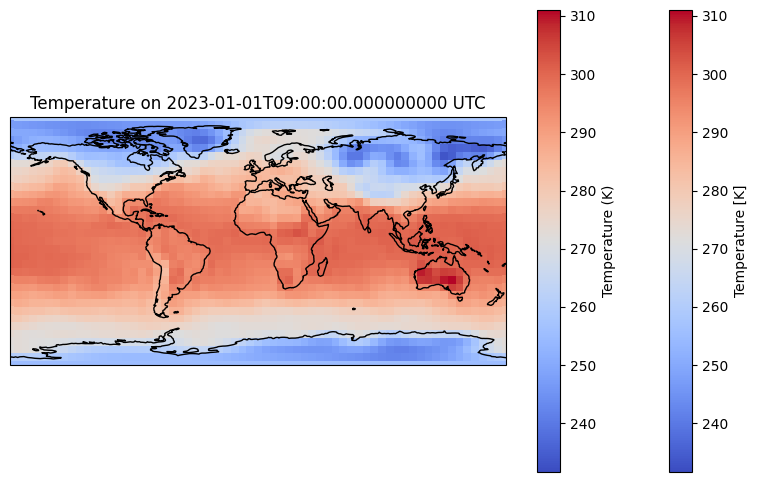

In [44]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_data.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='coolwarm',
                                                     vmin=temperature_data.min(),
                                                     vmax=temperature_data.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_data.time.values[0]))

# Show the plot
plt.show()


Defining a projection, in the context of geographical plotting or mapping, means specifying how the three-dimensional surface of the Earth should be represented on a two-dimensional plane (such as a computer screen or a piece of paper). Since the Earth is roughly spherical, representing its surface on a flat surface requires a projection, which inevitably introduces distortions in properties like distance, area, shape, or direction.

-ccrs.PlateCarree(): This specifies the Plate Carrée projection, which is one of the simplest projections commonly used for visualizing data on a latitude-longitude grid. In the Plate Carrée projection, the latitude and longitude lines form a regular grid, with lines of latitude and longitude appearing as straight, evenly spaced lines. However, this projection results in significant distortion, particularly at higher latitudes, where distances between lines of latitude and longitude
 become increasingly exaggerated.

 -plt.axes(projection=...): This creates a set of axes for plotting, with the specified projection. In this case, the Plate Carrée projection is used, meaning that the data will be plotted directly using latitude and longitude coordinates.


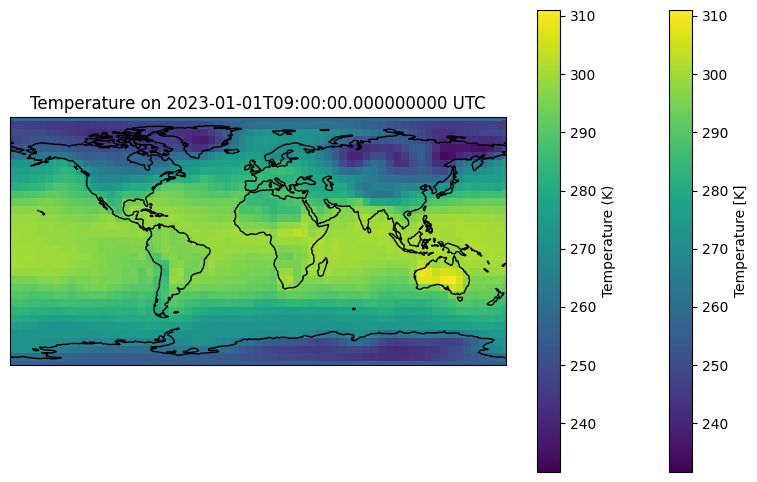

In [53]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm=temperature_data.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                              x='longitude', y='latitude',
                                              cmap='viridis',
                                              vmin=temperature_data.min(),
                                              vmax=temperature_data.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_data.time.values[0]))

# Show the plot
plt.show()


mi sa che questo è il valore della temperatura alle 6

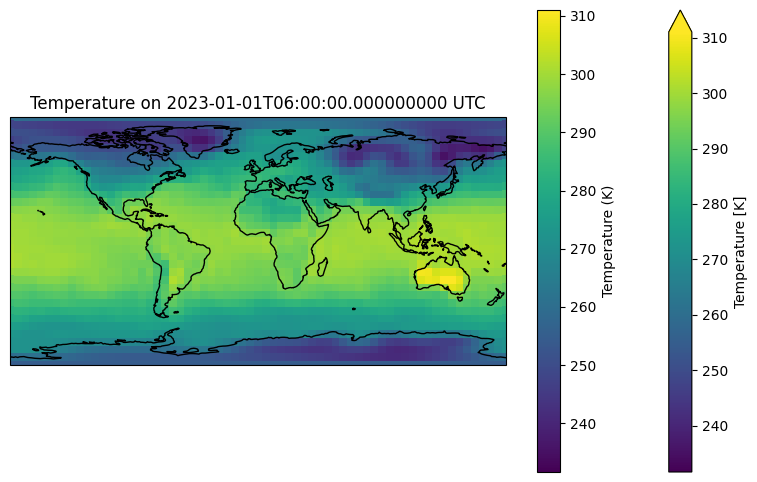

In [93]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_data3.isel(time=0).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_data.min(),
                                                     vmax=temperature_data.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_data3.time.values[0]))

# Show the plot
plt.show()


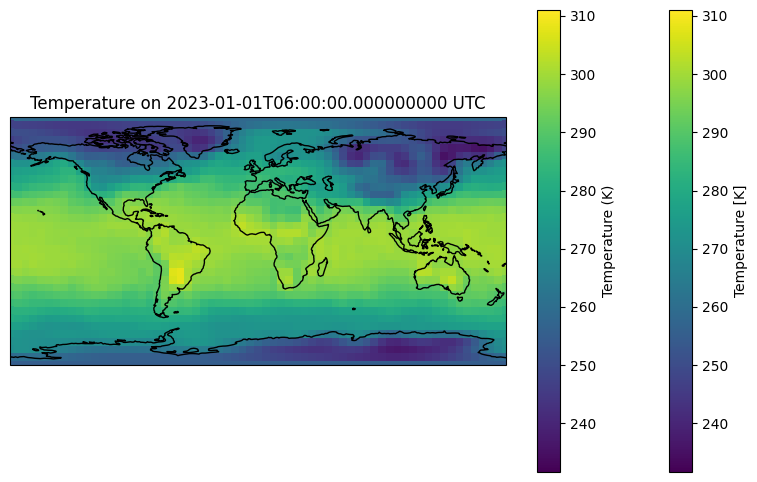

In [92]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the projection (PlateCarree for lat/lon data)
ax = plt.axes(projection=ccrs.PlateCarree())

# Plot temperature data
pcm = temperature_data3.isel(time=1).plot.pcolormesh(ax=ax, transform=ccrs.PlateCarree(),
                                                     x='longitude', y='latitude',
                                                     cmap='viridis',
                                                     vmin=temperature_data.min(),
                                                     vmax=temperature_data.max())

# Add coastlines
ax.coastlines()

# Add a colorbar
plt.colorbar(pcm, label='Temperature (K)')

# Add title
plt.title('Temperature on {} UTC'.format(temperature_data3.time.values[0]))

# Show the plot
plt.show()


questo è il valore di temeperatura alle 18